# Constants

In [1]:
NUMBER_OF_PROCESSORS = 20
CLUSTERS_WIDTH = 2
WATER_SIMULATION_IDS = [['W', 1, ' OW '], ['W', 2, ' OW ']]
WATER_REFERENCE_IDS = [['W', 1, ' OW '], ['W', 2, ' OW ']]
FIRST_ATOMS_TO_IGNORE = 0

# Imports

In [2]:
import os
from sklearn import cluster
import matplotlib.pyplot as plt
from matplotlib import patches

from scripts import obtain_water_data_from, get_reference_coords
from scripts import get_density, get_matchs, fulfill_condition
from scripts import write_centroids, get_metric, get_ordered_matchs
from scripts import add_matchs_to_reports

#  Heat Shock Protein 90 with 3RQ

In [3]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/HSP90/with_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [4]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + '3RQ_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 23 epochs and 2921 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [5]:
ref_coords = get_reference_coords('HSP90_3RQ_original.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

## Clustering

In [6]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

In [7]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

## Clustering analysis

In [8]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [9]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

## Display results

In [10]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.532
        1        0.177
        2        0.097
        3        0.062
        4        0.033
        5        0.062
        6        0.031
        7        0.007
        8        0.000


In [11]:
write_centroids(estimator, densities, SIMULATION_PATH + 'PDB/3RQ_centroids.pdb', normalize=False)

In [12]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg93_distance')
rmsds = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='RMSD')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters, FIRST_ATOMS_TO_IGNORE)
add_matchs_to_reports(list_of_reports, matchs, FIRST_ATOMS_TO_IGNORE)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

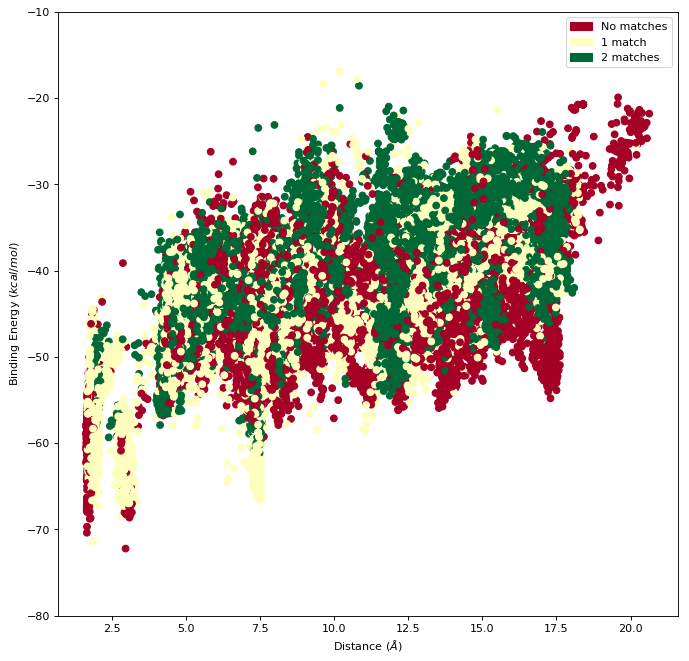

In [13]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/3RQ_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

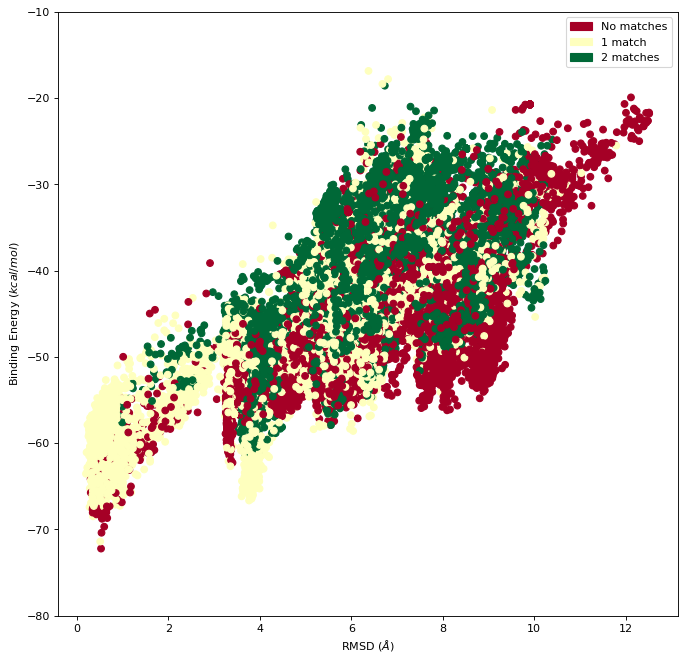

In [14]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('RMSD (' + r'$\AA$' + ')')
sc = ax.scatter(rmsds, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/3RQ_BE_RMSD.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

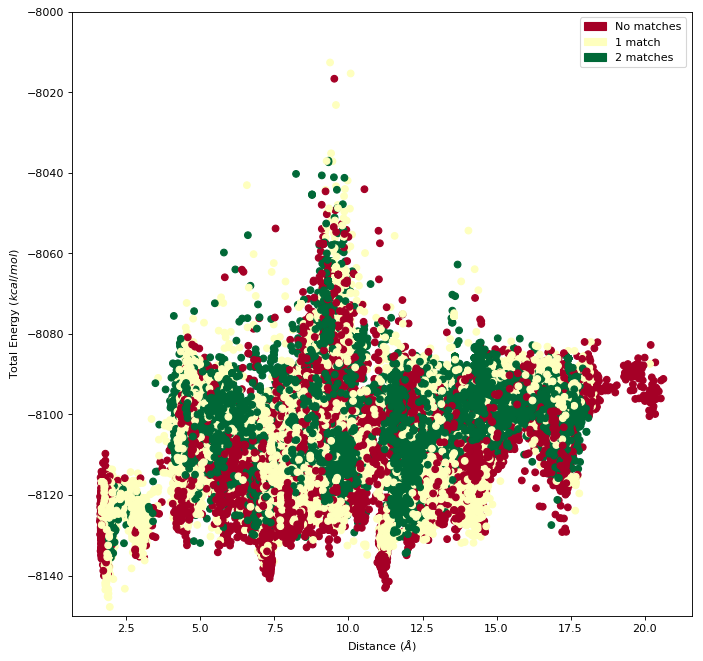

In [15]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
ax.set(ylim=(-8150, -8000))
plt.savefig(SIMULATION_PATH + 'Plots/3RQ_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

#  Heat Shock Protein 90 with 3RR

In [16]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/HSP90/with_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [17]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + '3RR_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 23 epochs and 2921 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [18]:
ref_coords = get_reference_coords('HSP90_3RQ_original.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

## Clustering

In [19]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

In [20]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

## Clustering analysis

In [21]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [22]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

## Display results

In [23]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.396
        1        0.223
        2        0.085
        3        0.075
        4        0.094
        5        0.070
        6        0.051
        7        0.001
        8        0.000
        9        0.000
       10        0.002
       11        0.000
       12        0.000
       13        0.001
       14        0.000


In [24]:
write_centroids(estimator, densities, SIMULATION_PATH + 'PDB/3RR_centroids.pdb', normalize=False)

In [25]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg93_distance')
rmsds = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='RMSD')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters, FIRST_ATOMS_TO_IGNORE)
add_matchs_to_reports(list_of_reports, matchs, FIRST_ATOMS_TO_IGNORE)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

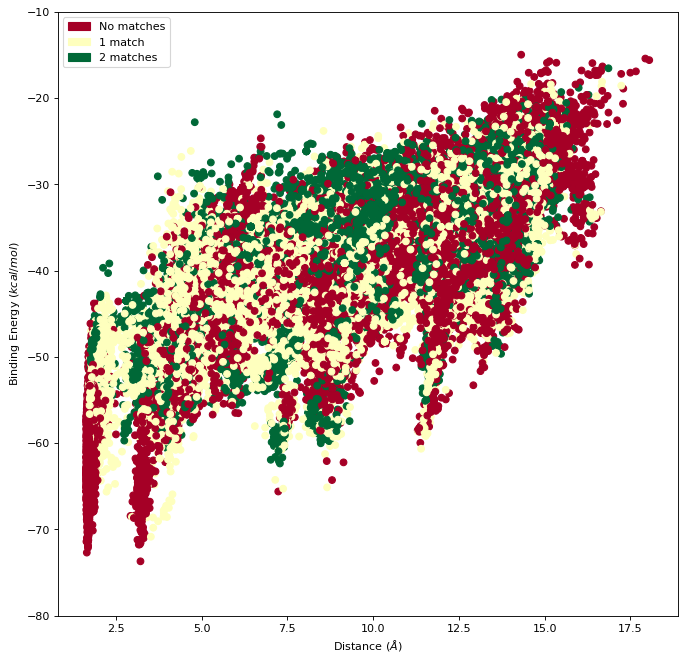

In [26]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/HSP90_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

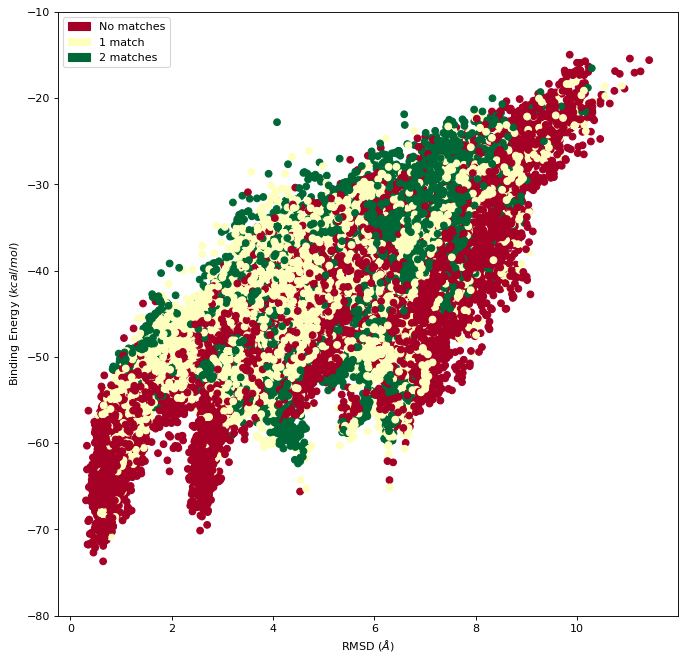

In [27]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('RMSD (' + r'$\AA$' + ')')
sc = ax.scatter(rmsds, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/4STD_BE_RMSD.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

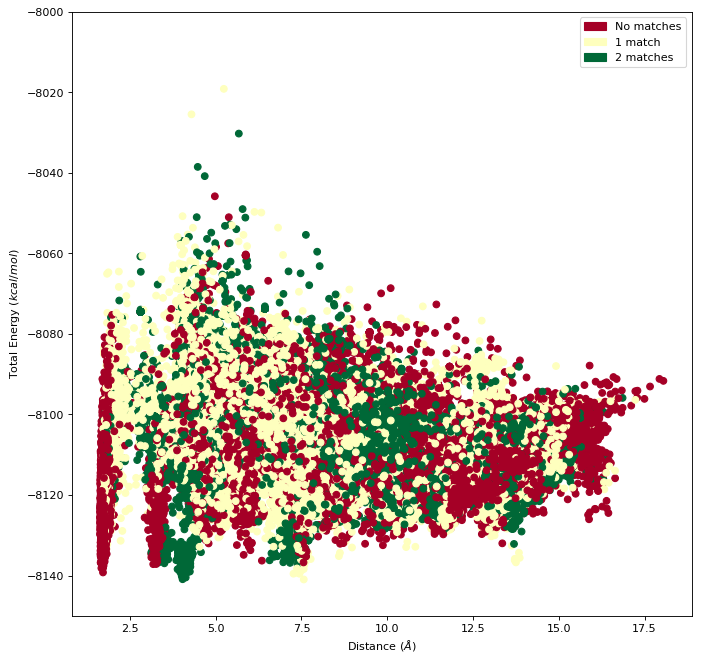

In [28]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
ax.set(ylim=(-8150, -8000))
plt.savefig(SIMULATION_PATH + 'Plots/4STD_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

#  Heat Shock Protein 90 with 3RQ without water

In [29]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/HSP90/without_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data

In [30]:
_, list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + '3RQ_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 30 epochs and 3810 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


In [31]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
rmsds = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='RMSD')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg149_distance')
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn

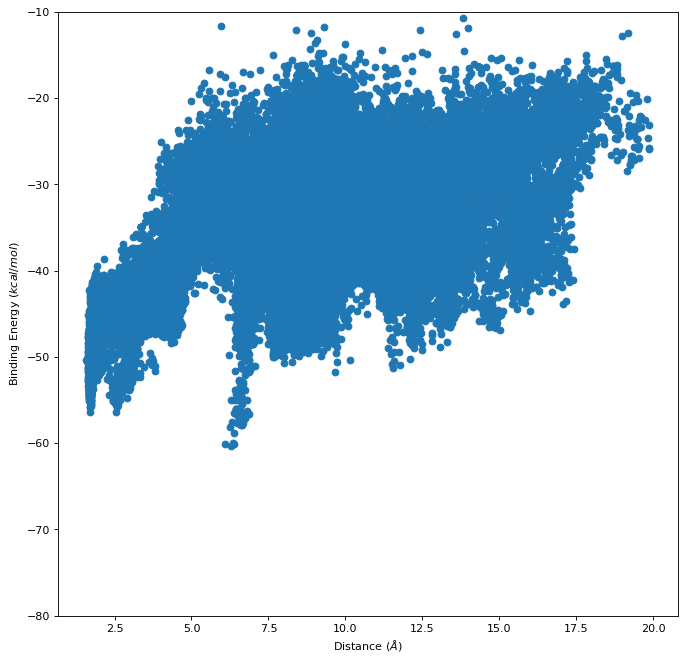

In [32]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, cmap=cmap, norm=norm)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/3RQ_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

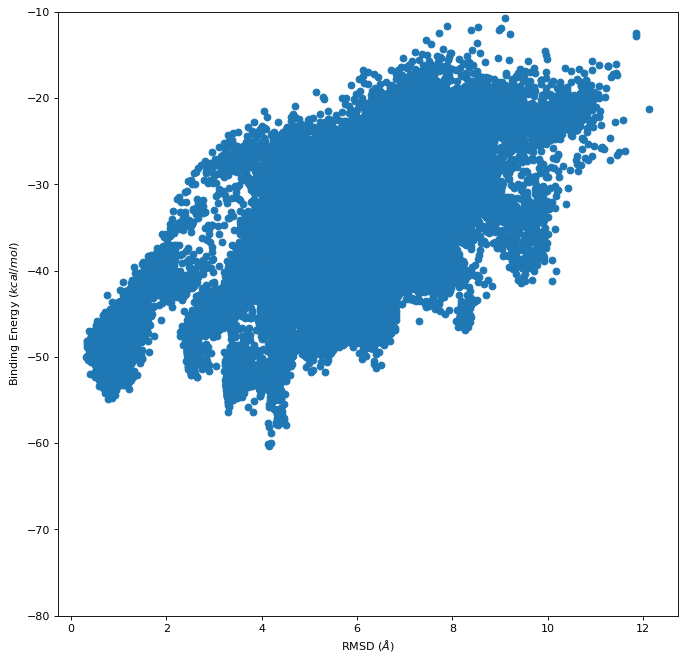

In [33]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('RMSD (' + r'$\AA$' + ')')
sc = ax.scatter(rmsds, energies, cmap=cmap, norm=norm)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/3RQ_BE_RMSD.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

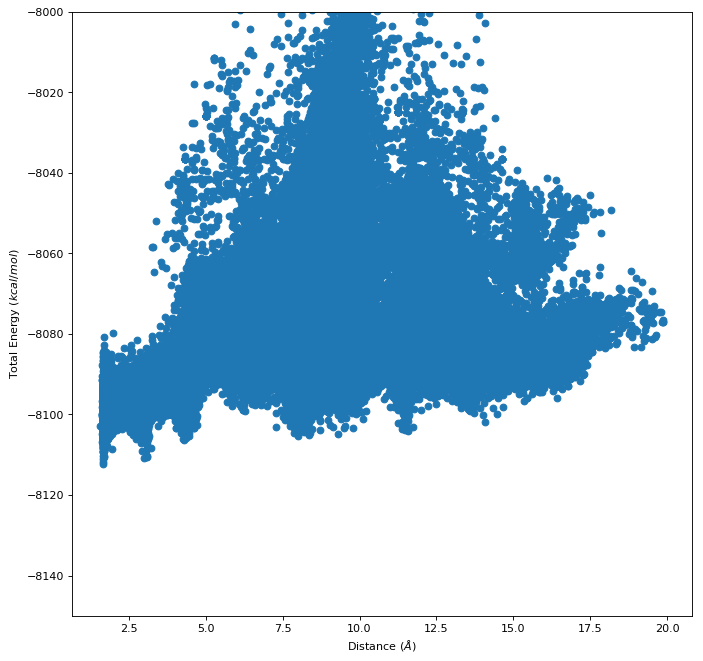

In [34]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, cmap=cmap, norm=norm)
ax.set(ylim=(-8150, -8000))
plt.savefig(SIMULATION_PATH + 'Plots/3RQ_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

#  Heat Shock Protein 90 with 3RR without water

In [35]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/HSP90/without_water/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data

In [36]:
_, list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + '3RR_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 30 epochs and 3810 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


In [37]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
rmsds = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='RMSD')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg149_distance')
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn

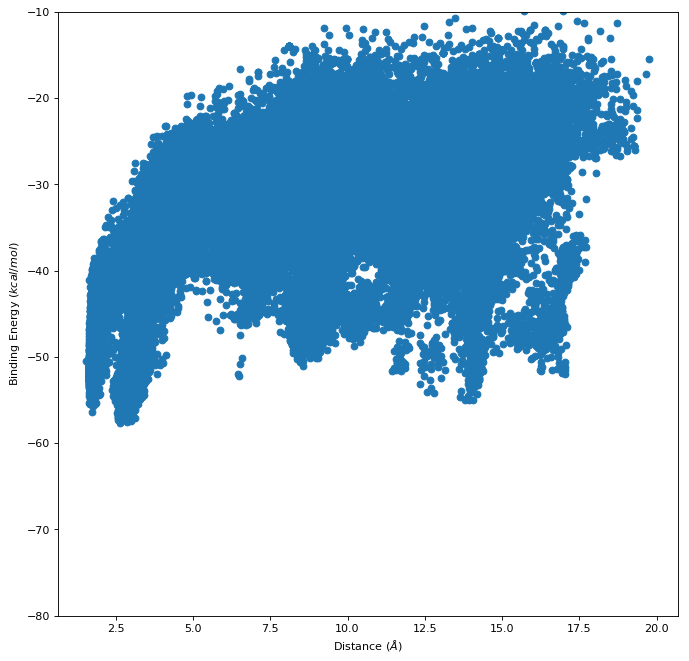

In [38]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, cmap=cmap, norm=norm)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/4RR_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

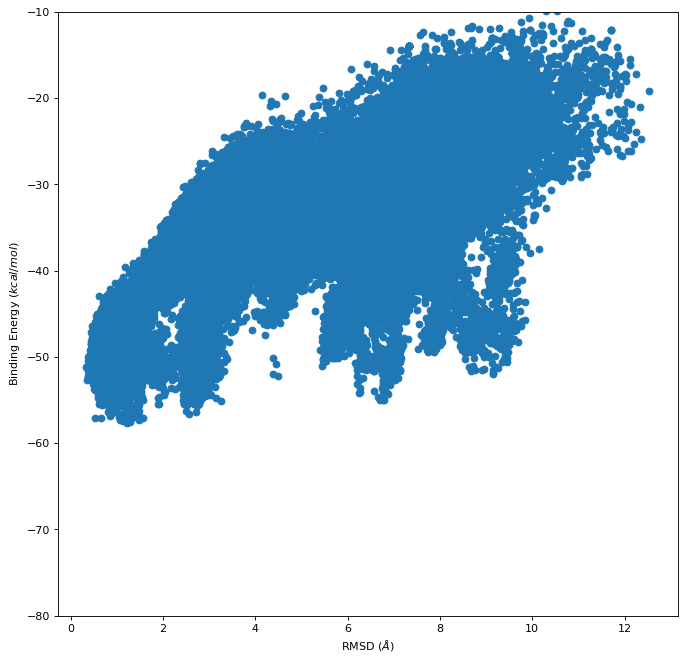

In [39]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('RMSD (' + r'$\AA$' + ')')
sc = ax.scatter(rmsds, energies, cmap=cmap, norm=norm)
ax.set(ylim=(-80, -10))
plt.savefig(SIMULATION_PATH + 'Plots/3RR_BE_RMSD.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

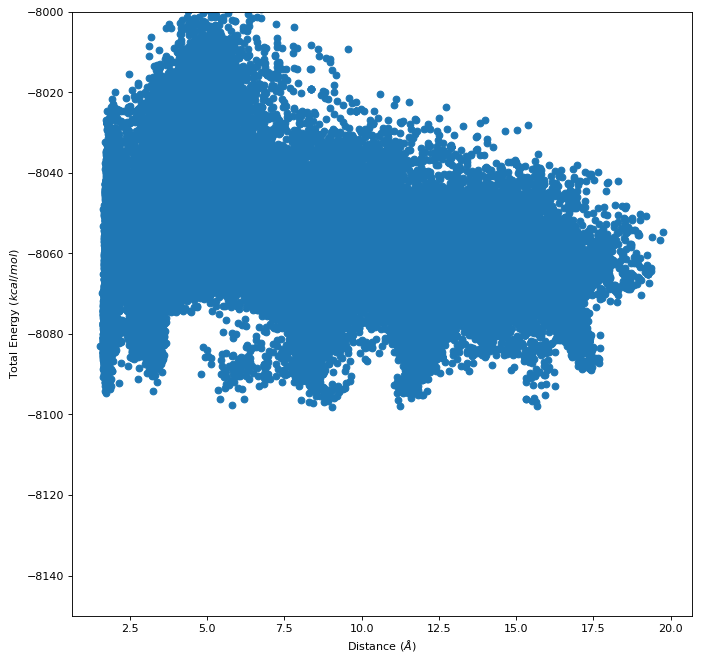

In [40]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, cmap=cmap, norm=norm)
ax.set(ylim=(-8150, -8000))
plt.savefig(SIMULATION_PATH + 'Plots/3RR_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

# TODO
- Try a smaller water perturbation radius to avoid water to go too much to the solvent
- Finish the 30 adaptive epochs

# Summary
- Centroid densities agree with the fact that water is not comfortable in the crystallographic positions with ligand 3RR.
- Minima at low RMSDs and distances need no water in crystallographic positions for ligand 3RR. On the other hand, ligand 3RQ may need water to correctly adopt a good pose within the binding site. In the binding energy plots we see how both cases form the best minimum: water is not required for the ligand to adopt the right conformation. However, in the total energy plots we see that those structures with 3RQ and waters correctly placed, the energy is much lower than those that contain water at different positions respect to the reference.